<a href="https://colab.research.google.com/github/shengchishih/Machine-Learning-and-Deep-Learning/blob/main/Car%20price-Multiple%20linear%20regression%2C%20Polynomial%20regression%2C%20and%20Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df=pd.read_csv(filepath)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Create the linear regression object:

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
X = df[['highway-mpg']]
Y = df[['price']]

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [ ]:
lm.intercept_

array([38423.30585816])

In [ ]:
lm.coef_

array([[-821.73337832]])

In [ ]:
lm1=LinearRegression()
lm1

LinearRegression()

In [ ]:
X1=df[['engine-size']]
Y1=df[['price']]
lm1.fit(X1,Y1)

LinearRegression()

In [ ]:
print('the slope is', lm.coef_[0][0])
print('the intercept is', lm.intercept_[0])

the slope is -821.7333783219254
the intercept is 38423.3058581574


#Multiple Linear Regression

In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [ ]:
lm.fit(Z, df['price'])

LinearRegression()

In [ ]:
lm.intercept_

-15806.62462632922

In [ ]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [ ]:
lm2=LinearRegression()
Z2=df[['normalized-losses','highway-mpg']]
lm2.fit(Z2,df['price'])

LinearRegression()

In [ ]:
lm2.intercept_

38201.31327245728

In [ ]:
lm2.coef_

array([   1.49789586, -820.45434016])

# Model Evaluation Using Visualization

In [ ]:
import seaborn as sns

(0.0, 48166.969138918575)

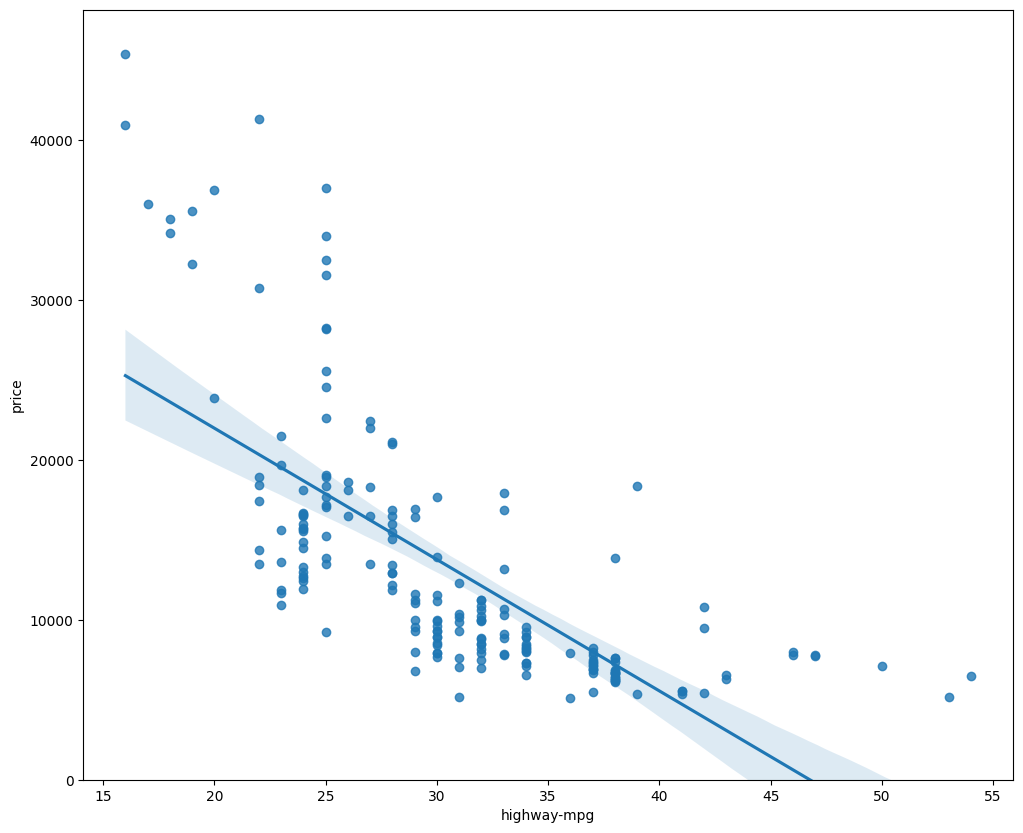

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

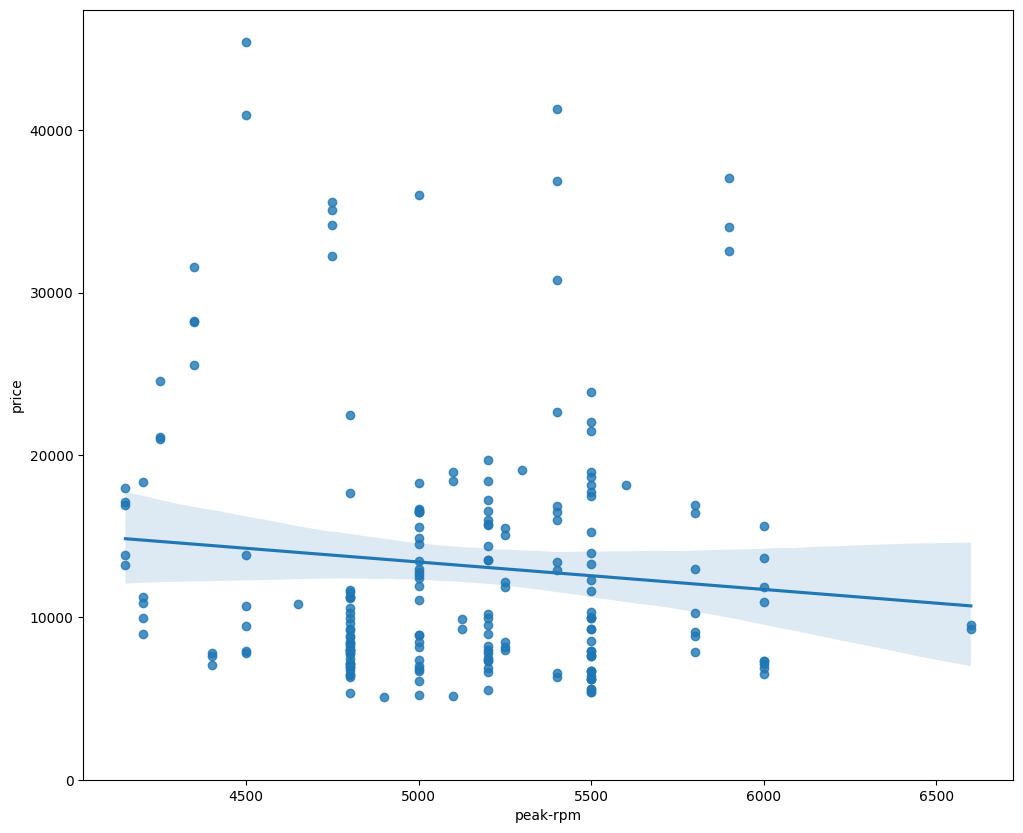

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [ ]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are **randomly spread out around the x-axis**, then a linear model is appropriate for the data.

**Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.**

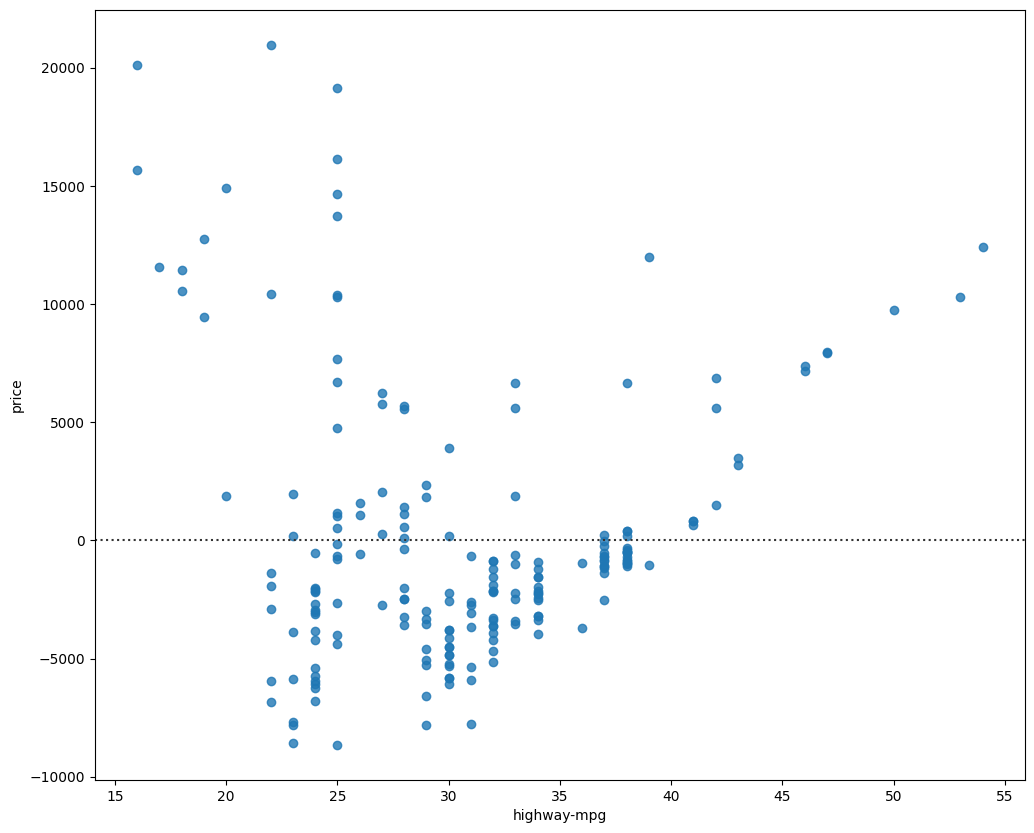

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

#Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [ ]:
Y_hat = lm.predict(Z)

<ipython-input-37-7377bca648c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-37-7377bca648c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

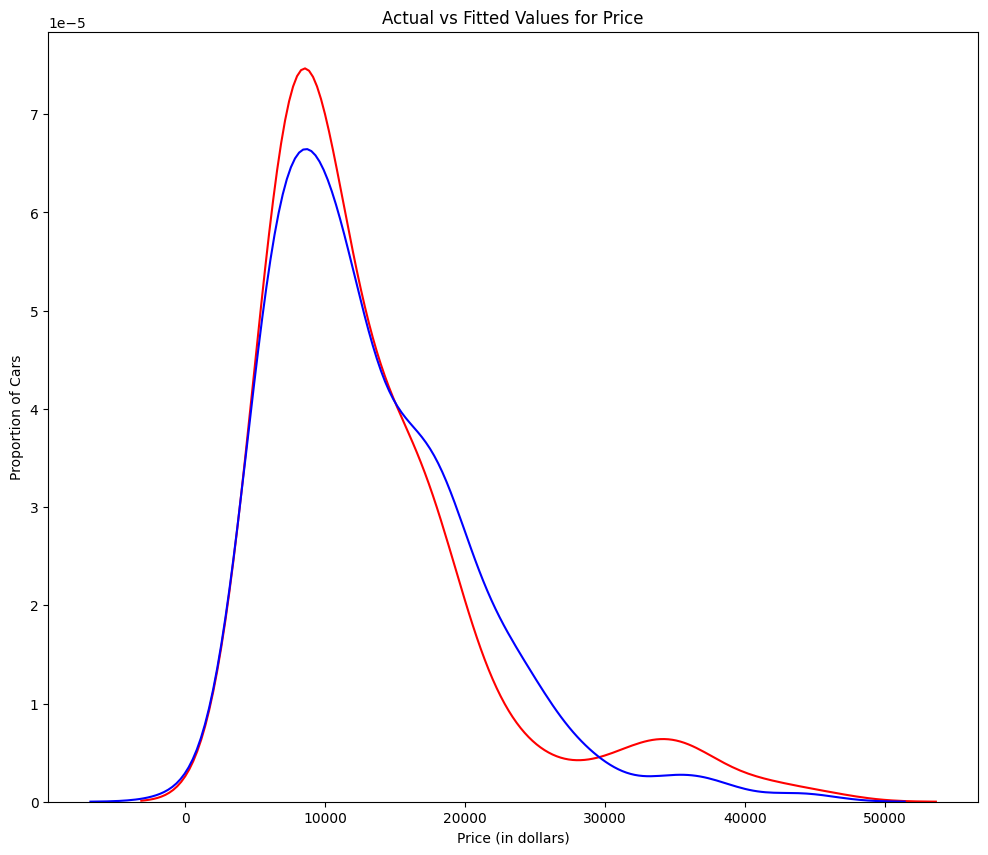

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# Polynomial Regression and Pipelines

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic)
#Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


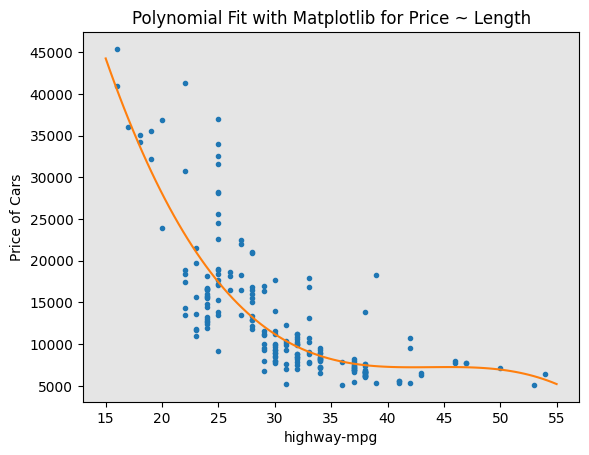

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [ ]:
f=np.polyfit(x,y,11)
poly=np.poly1d(f)
print(poly)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


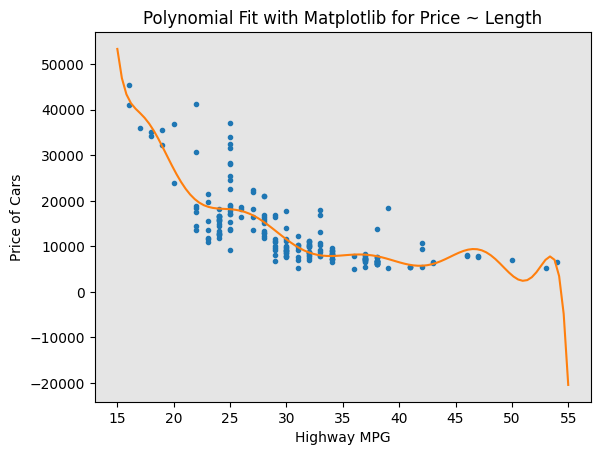

In [ ]:
PlotPolly(poly,x,y,'Highway MPG')

We can perform a polynomial transform on multiple features. First, we import the module:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z_pr.shape

(201, 15)

#Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [ ]:
#Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- R^2 / R-squared
- Mean Squared Error (MSE)

##R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

##Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

In [ ]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [ ]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [ ]:
# fit the model
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [ ]:
Y_predict_multifit = lm.predict(Z)

In [ ]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [ ]:
mean_squared_error(df['price'], p(x))

20474146.426361218

# Prediction and Decision Making

In [ ]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [ ]:
lm.fit(X, Y)
lm

LinearRegression()

In [ ]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

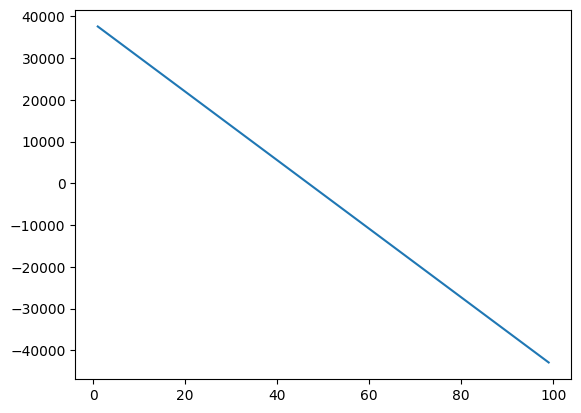

In [ ]:
plt.plot(new_input, yhat)
plt.show()